# 김해공항 이용자수 분석 및 예측

In [61]:
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [62]:
file_path="./ref/출입국_항구_내외국인_성별_국제이동_연간__20250305121241.csv"
ori=pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,항목,시점,데이터
0,김해(김해공항),내국인,남자,입국자,2013,16538
1,김해(김해공항),내국인,남자,입국자,2014,17240
2,김해(김해공항),내국인,남자,입국자,2015,16000
3,김해(김해공항),내국인,남자,입국자,2016,16759
4,김해(김해공항),내국인,남자,입국자,2017,17307


In [63]:
ex1_data = ori.copy()
ex1_data.columns =["Airport","type1","gender","type2","year","value"]
ex1_data

,Airport,type1,gender,type2,year,value
0,김해(김해공항),내국인,남자,입국자,2013,16538
1,김해(김해공항),내국인,남자,입국자,2014,17240
2,김해(김해공항),내국인,남자,입국자,2015,16000
3,김해(김해공항),내국인,남자,입국자,2016,16759
4,김해(김해공항),내국인,남자,입국자,2017,17307
...,...,...,...,...,...,...
83,김해(김해공항),외국인,여자,출국자,2019,19623
84,김해(김해공항),외국인,여자,출국자,2020,8330
85,김해(김해공항),외국인,여자,출국자,2021,1558
86,김해(김해공항),외국인,여자,출국자,2022,4596


In [64]:
filter1 = ex1_data['type1']=='내국인'
ex1_data=ex1_data[filter1]
ex1_data

,Airport,type1,gender,type2,year,value
0,김해(김해공항),내국인,남자,입국자,2013,16538
1,김해(김해공항),내국인,남자,입국자,2014,17240
2,김해(김해공항),내국인,남자,입국자,2015,16000
3,김해(김해공항),내국인,남자,입국자,2016,16759
4,김해(김해공항),내국인,남자,입국자,2017,17307
5,김해(김해공항),내국인,남자,입국자,2018,17737
6,김해(김해공항),내국인,남자,입국자,2019,17222
7,김해(김해공항),내국인,남자,입국자,2020,9318
8,김해(김해공항),내국인,남자,입국자,2021,363
9,김해(김해공항),내국인,남자,입국자,2022,2605


In [65]:
filter2= ex1_data['type2']=='입국자'
ex2_data= ex1_data[filter2]
filter3= ex1_data['type2']=='출국자'
ex3_data= ex1_data[filter3]
ex2_data=ex2_data.groupby('year')['value'].sum()
ex3_data=ex3_data.groupby('year')['value'].sum()
# ex3_data=ex3_data.groupby('year')['value'].sum().reset_index(name='total')
ex2_data

year
2013    30236
2014    30761
2015    28168
2016    30164
2017    30668
2018    32505
2019    31046
2020    16691
2021      462
2022     4143
2023    15257
Name: value, dtype: int64

<Axes: title={'center': '2021~2023 김해공항 내국인 출국 차트'}, xlabel='year'>

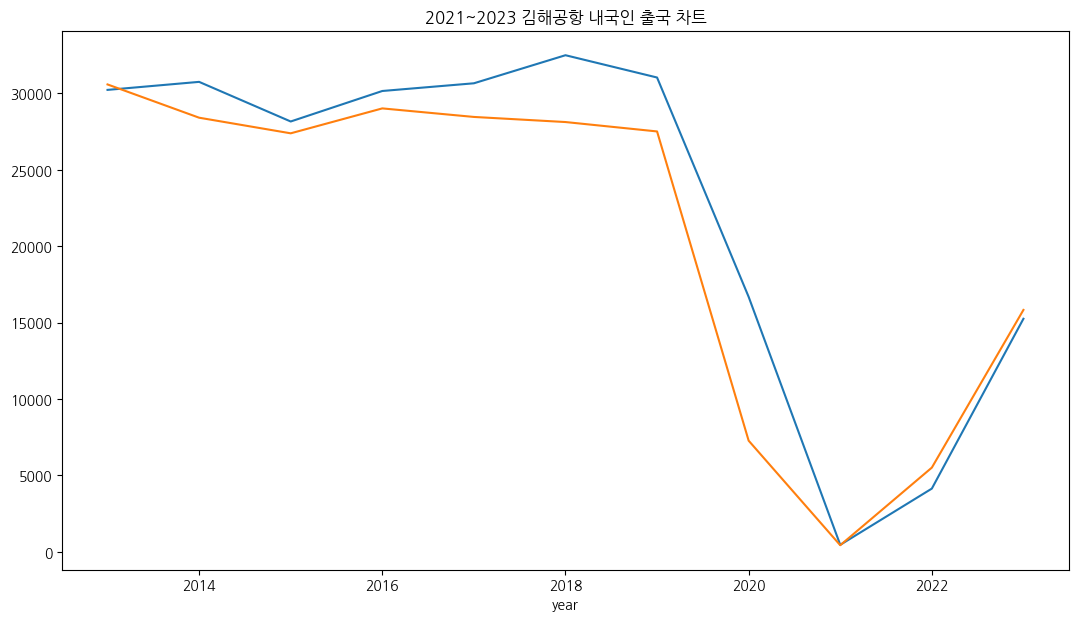

In [66]:
ex2_data.plot(figsize=(13,7),title="2021~2023 김해공항 내국인 입국 차트")
ex3_data.plot(figsize=(13,7),title="2021~2023 김해공항 내국인 출국 차트")

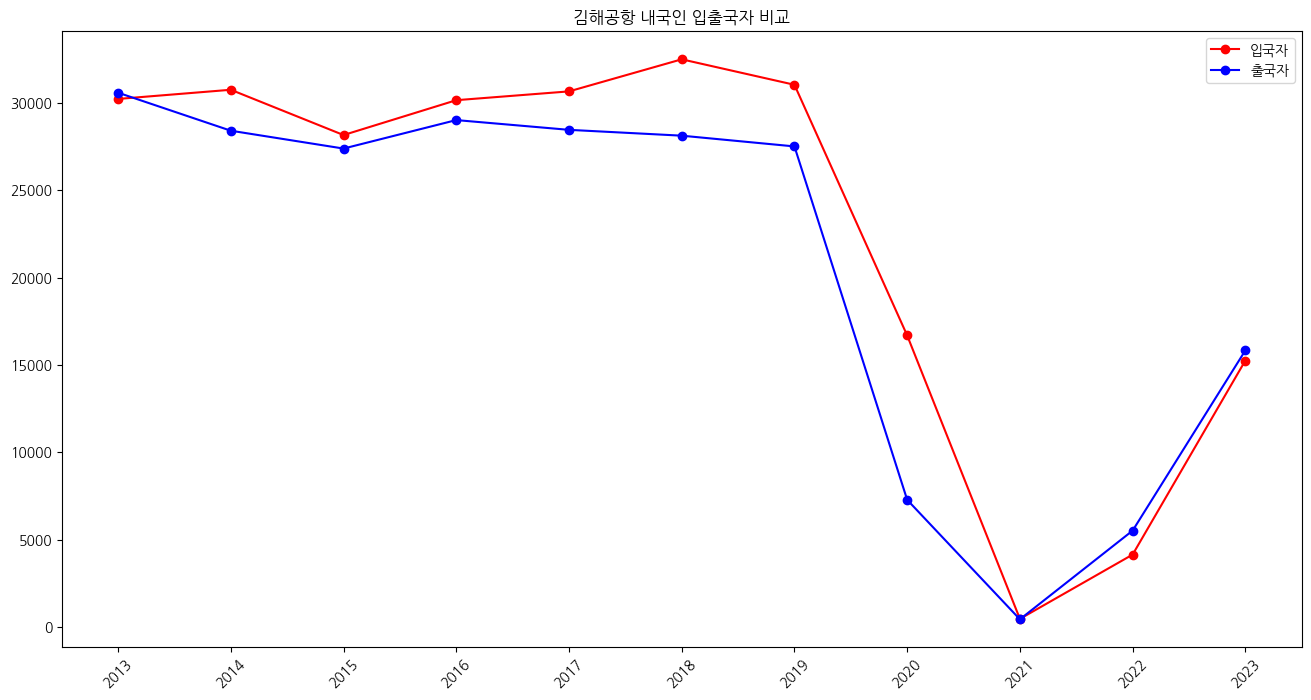

In [67]:
import matplotlib.pyplot as plt

# 그래프 생성
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# 데이터 플로팅
ax.plot(ex2_data, color="r",  marker='o', label="입국자")
ax.plot(ex3_data, color="b", marker='o', label="출국자")

# 그래프 제목 설정
ax.set_title("김해공항 내국인 입출국자 비교")

ax.set_xticks(ex2_data.index)  # X축의 눈금을 데이터 인덱스로 설정
ax.set_xticklabels(ex2_data.index, rotation=45)  # X축 연도를 45도 회전하여 가독성 향상

# 범례 추가
ax.legend()

# 이미지 저장
plt.savefig("./chart/김해공항_내국인_입출국_차트.png")

# 그래프 출력
plt.show()


# 김해공항 내국인 입출국자 리포트
- 2013년 부터 2023년 까지의 10년간의 정보를 나타낸 것이다.
- 2013년 부터 2019년 까지는 활발히 여행객들이 입출국 하는 것이 보이다가,
- 2020년을 기점으로 눈에 띄게 줄더니 2021년을 기점으로 최저점을 찍었다.
- 2020년도 와 2021년 에 왜 이런 수치가 나왔는지 생각하자면 코로나가 원인으로 보인다.
- 그후 서서히 다시 그 수가 오르고 있다.